# Подрубраем библиотеки

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Читаем датасеты

In [318]:
%config InlineBackend.figure_format='retina'

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0        1          60       RL         65.0     8450   Pave   NaN      Reg  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal   
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0  \
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Инфо

In [319]:
# Выводит информацию о DataFrame train, включая использование памяти
train.drop(['Id'],inplace=True,axis=1)
test.drop(['Id'],inplace=True,axis=1)
train.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Методы  анализа и предобработки будут зависеть от типа данных, так что для простоты дальнейшей работы выделим 2 подтаблицы с разными типами данных

In [177]:
# Создает новый DataFrame numeric_dt, содержащий только столбцы с типами данных int64 или float64
numeric_dt=train.select_dtypes(include=['int64','float64'])

# Выбираем все столбцы из датафрейма train, которые имеют тип данных "object"
object_dt = train.select_dtypes(include=['object'])

# Смотрим цифровые данные
## Boxplot

In [178]:
fig,axes= plt.subplots(5,8,figsize=(80,50))
for i,ax in enumerate(axes.flatten()[:-3]):
    sns.boxplot(data=numeric_dt.iloc[:,i],ax=ax)
    ax.set_title(numeric_dt.columns[i])
    
    


### Вывод boxplot

> Тут вывод



## Категориальные?

In [179]:
num_unique=numeric_dt.nunique().sort_values()
num_cat=num_unique[num_unique<25]
num_cat
num_num=num_unique[num_unique>=25]
num_num.shape
numeric_dt.loc[:,num_cat.index].iloc[:,3]

0       0
1       1
2       1
3       1
4       1
       ..
1455    1
1456    2
1457    2
1458    0
1459    0
Name: Fireplaces, Length: 1460, dtype: int64

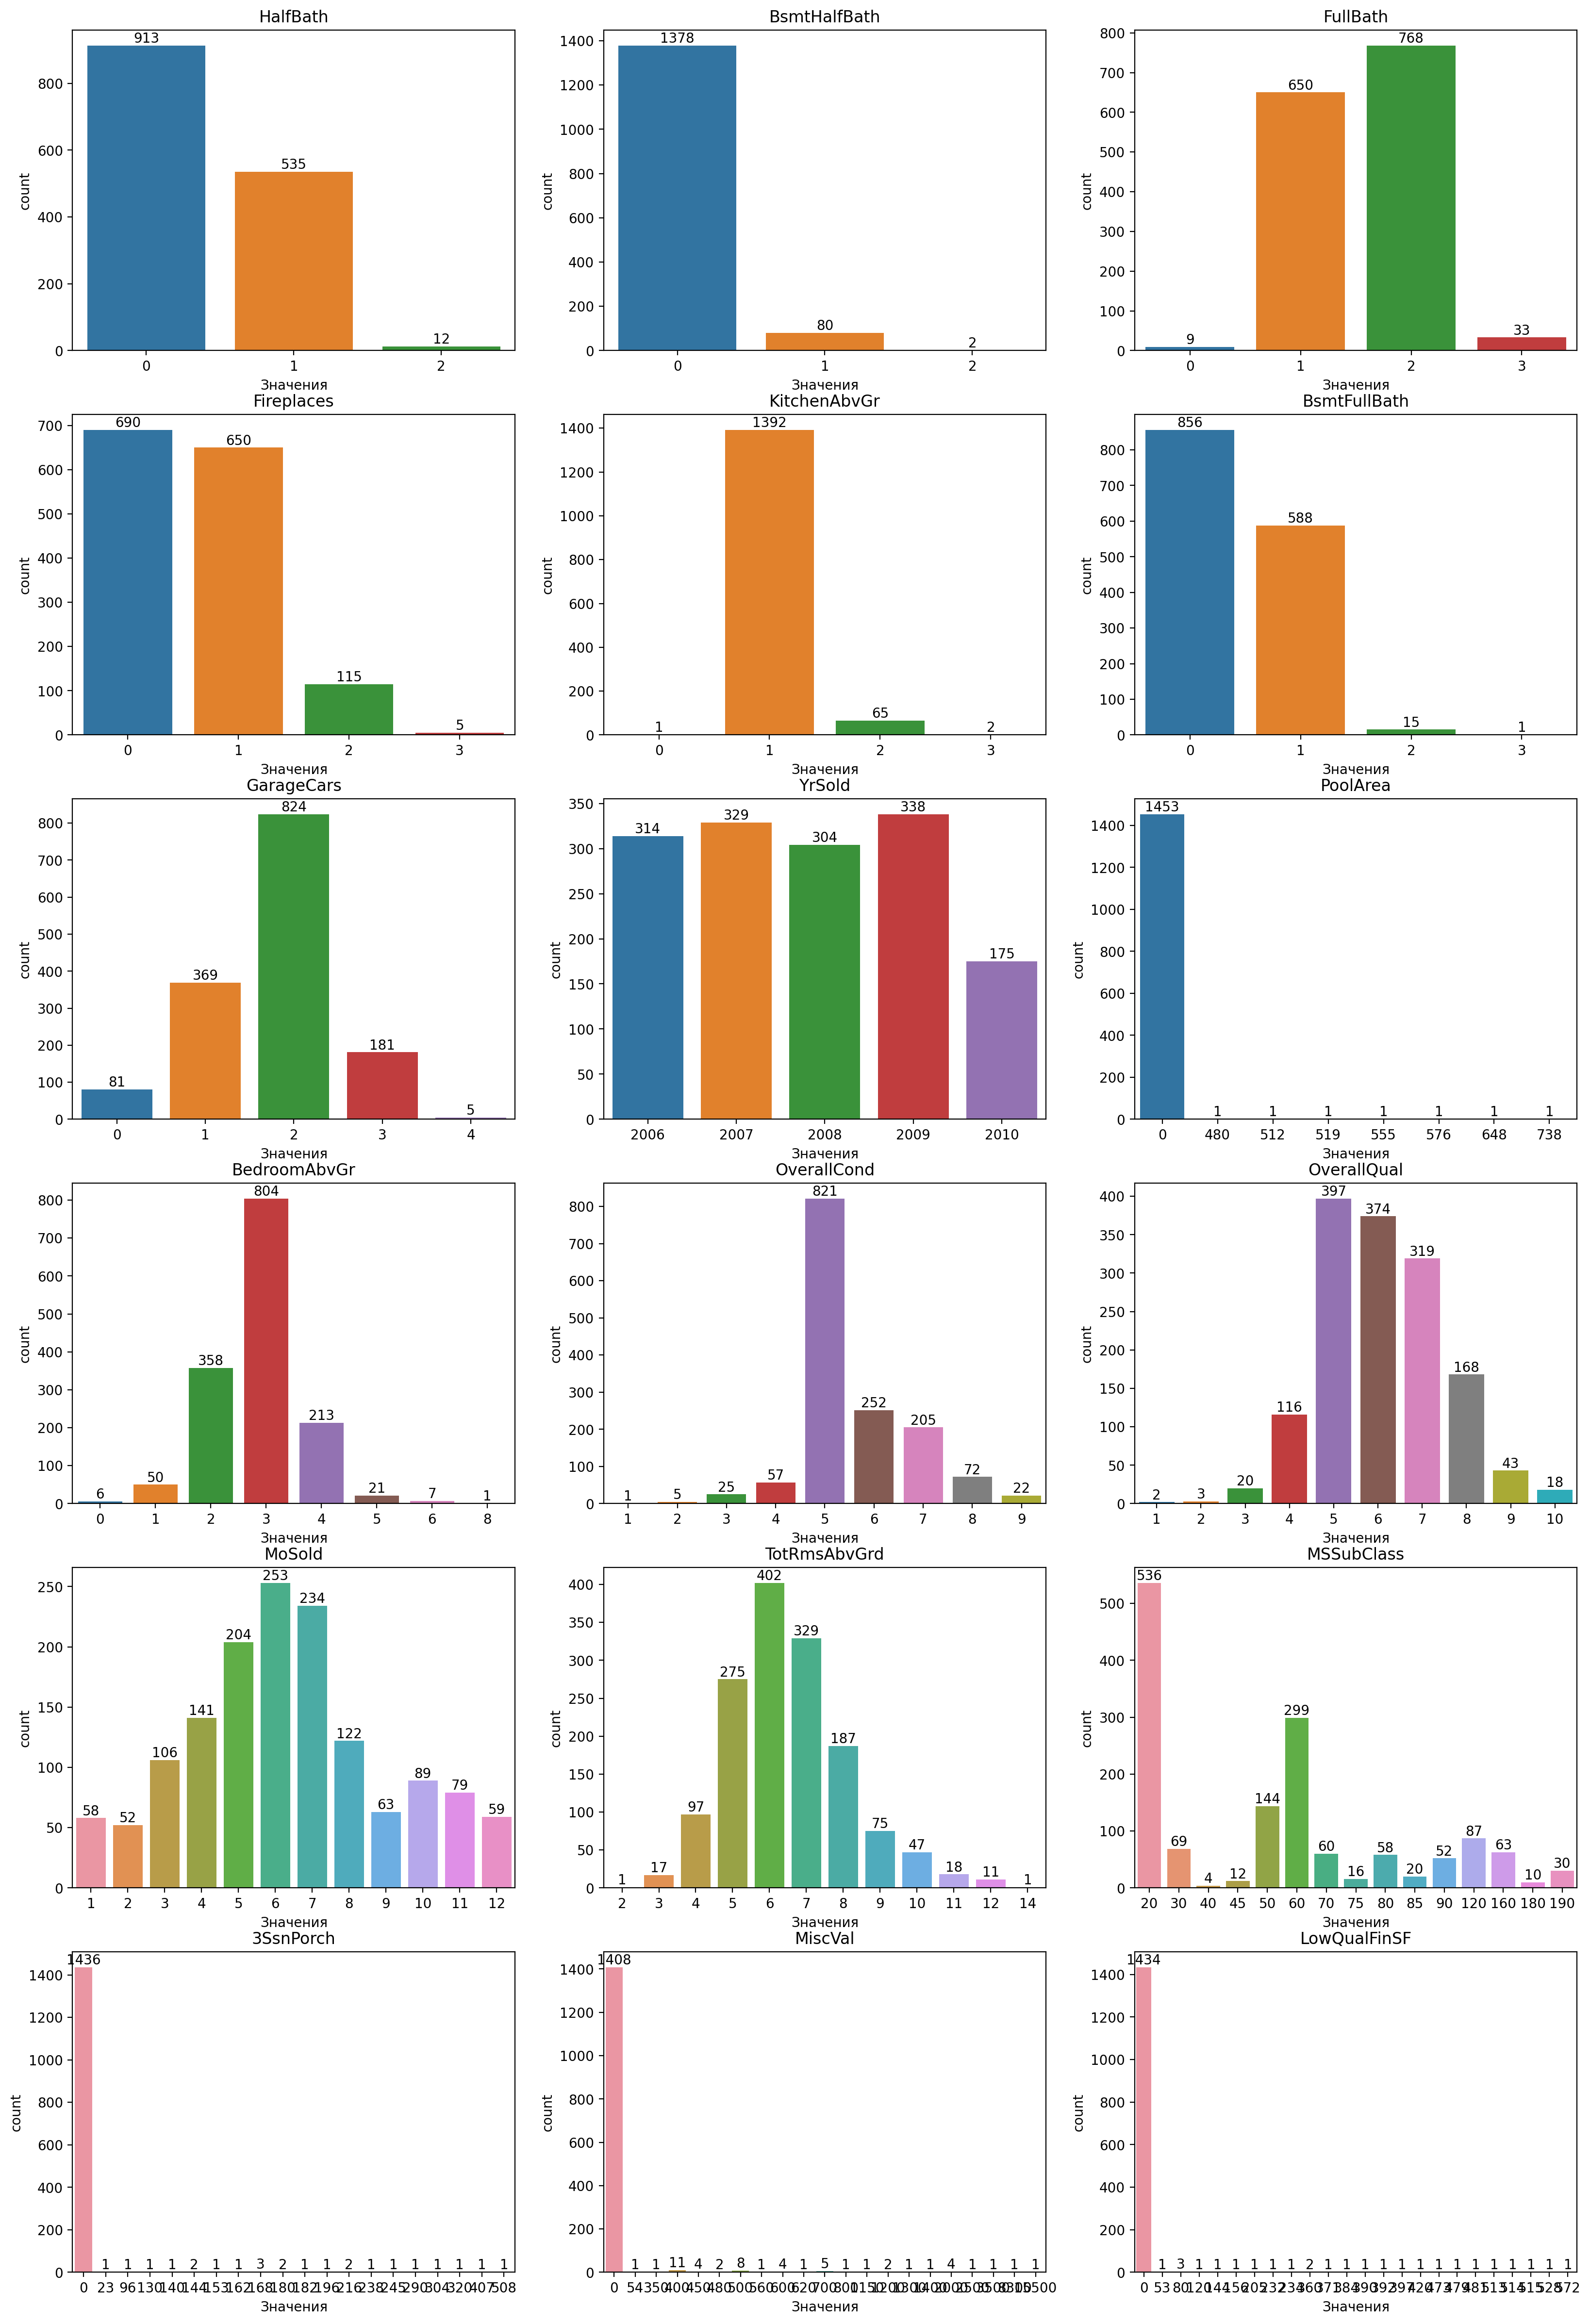

In [180]:
fig,axes= plt.subplots(6,3,figsize=(20,30))
for i,ax in enumerate(axes.flatten()):
    
    sns.countplot(x=numeric_dt.loc[:,num_cat.index].iloc[:,i],ax=ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(numeric_dt.loc[:,num_cat.index].columns[i])
    ax.set_xlabel('Значения')

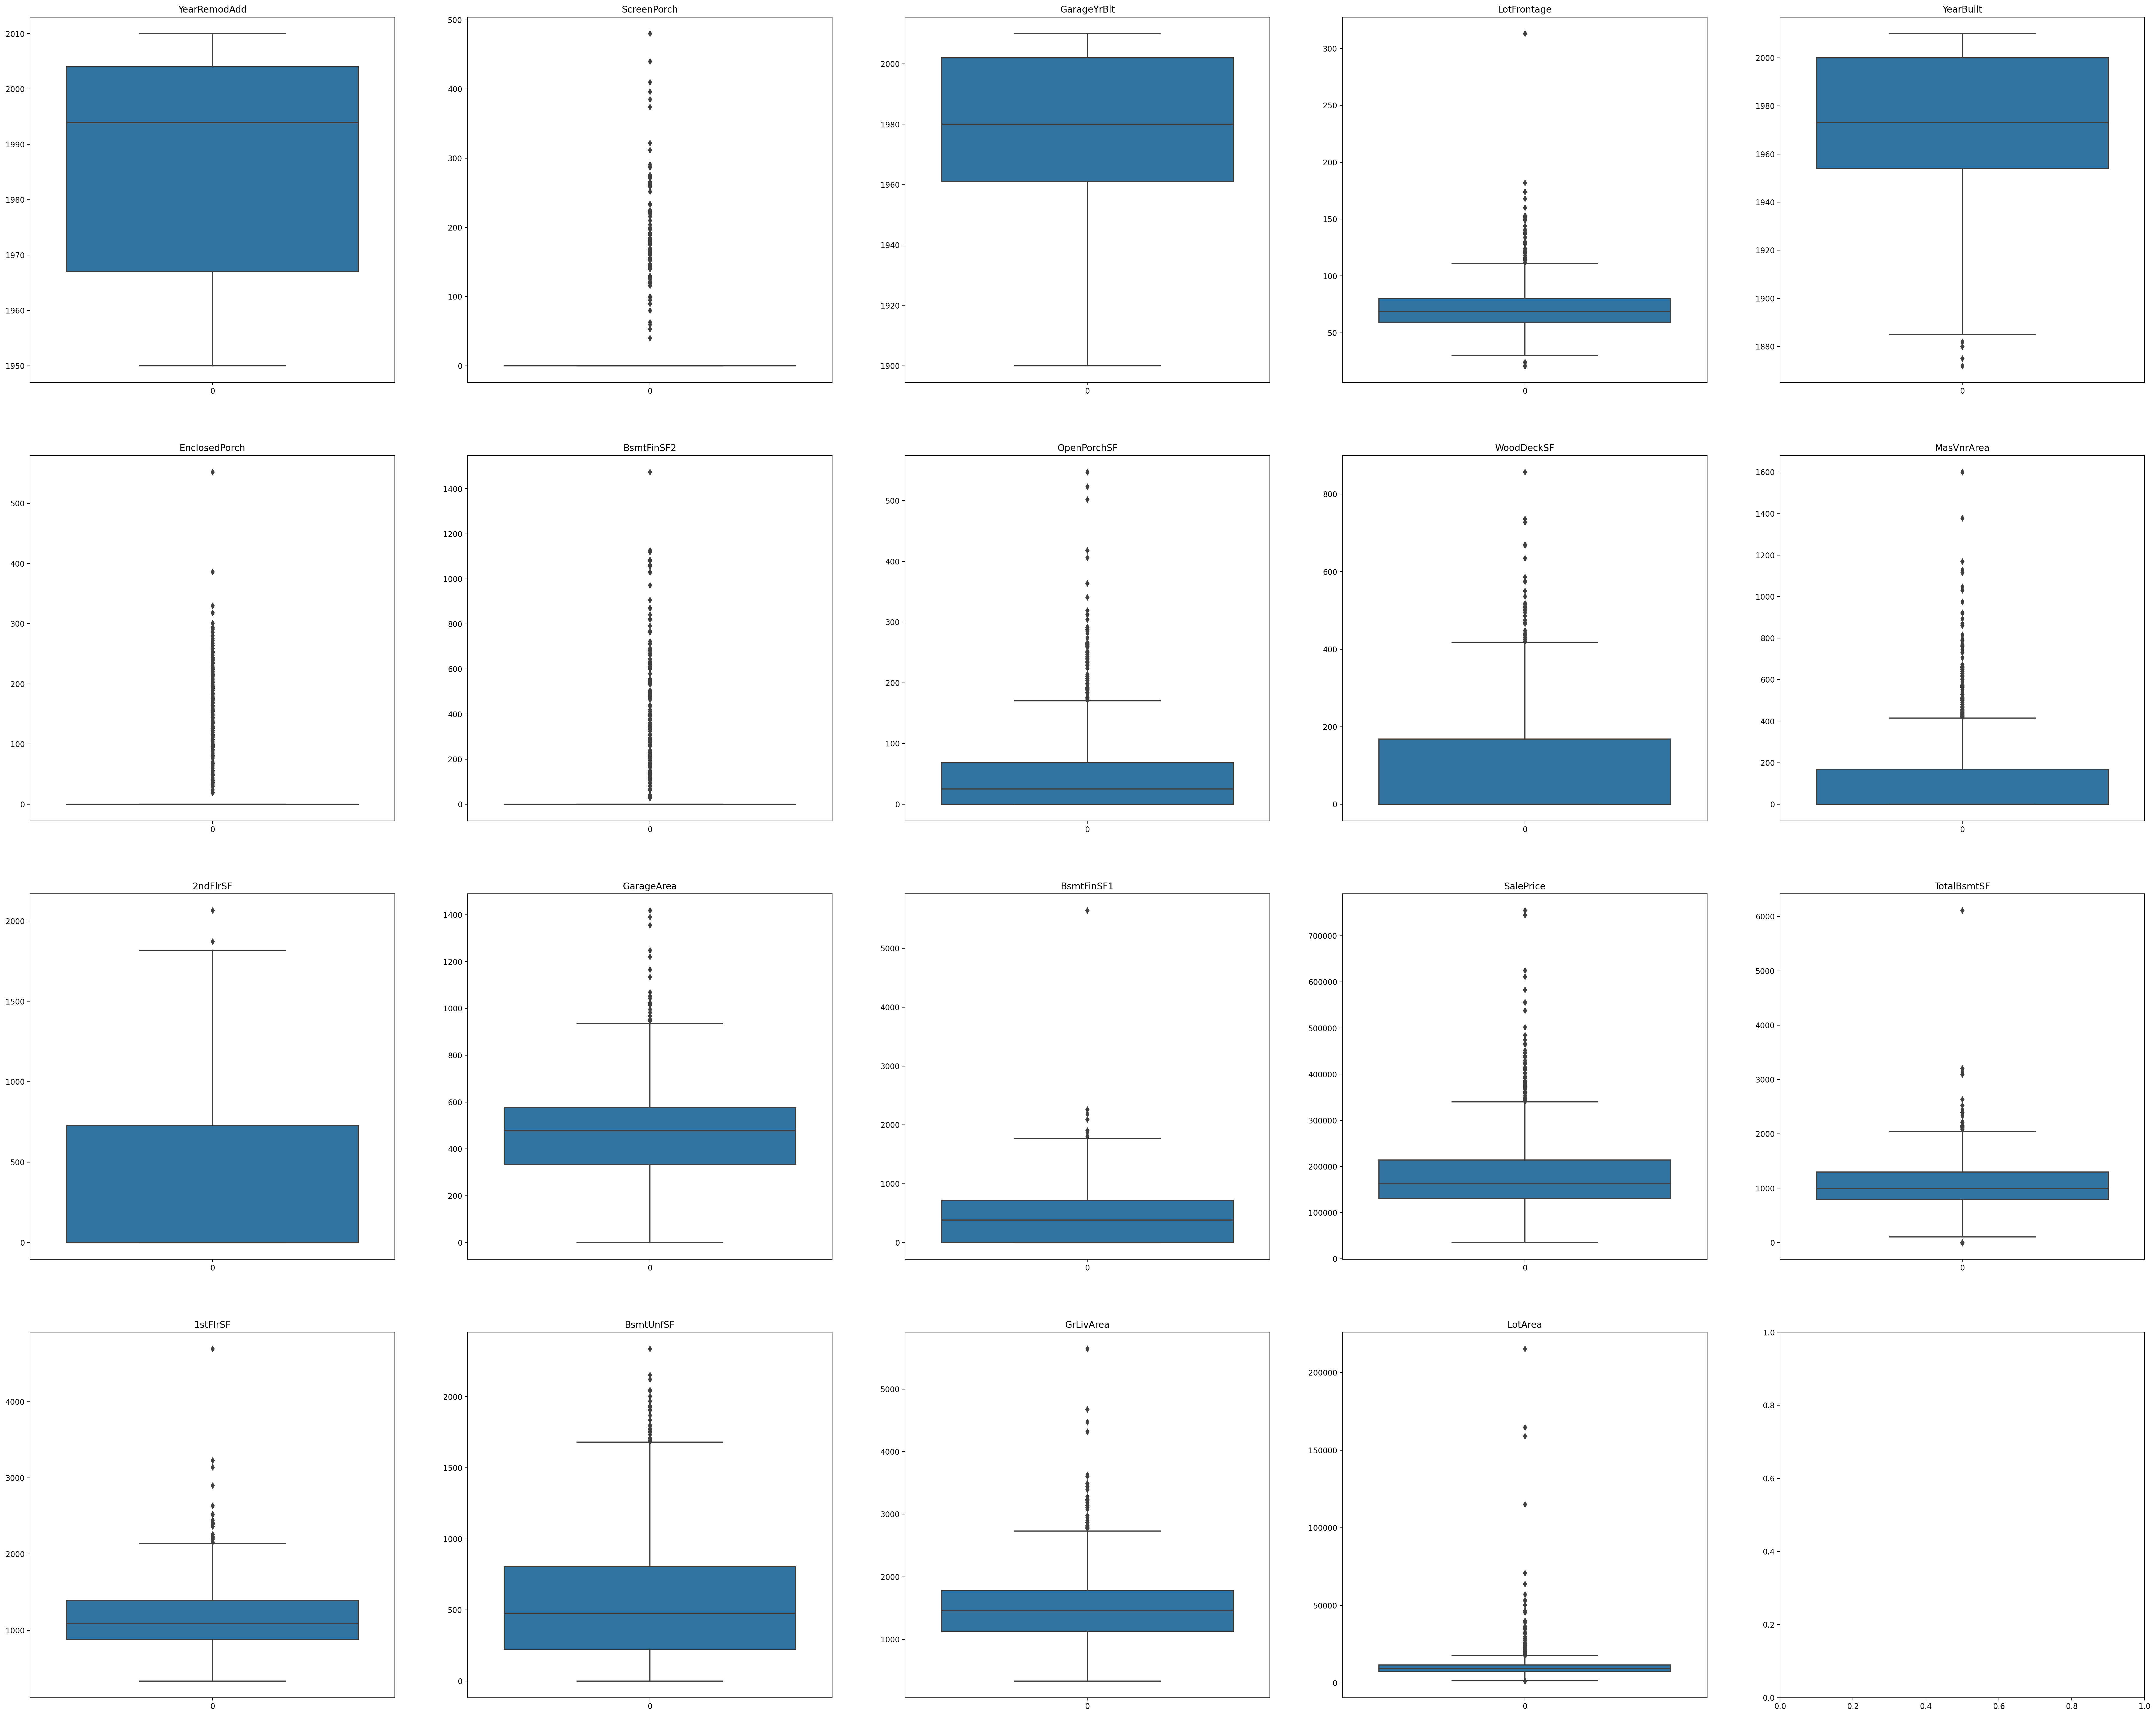

In [181]:
fig,axes= plt.subplots(4,5,figsize=(50,40))
for i,ax in enumerate(axes.flatten()[:-1]):
    sns.boxplot(data=numeric_dt.loc[:,num_num.index].iloc[:,i],ax=ax)
    ax.set_title(numeric_dt.loc[:,num_num.index].columns[i])

## Hist

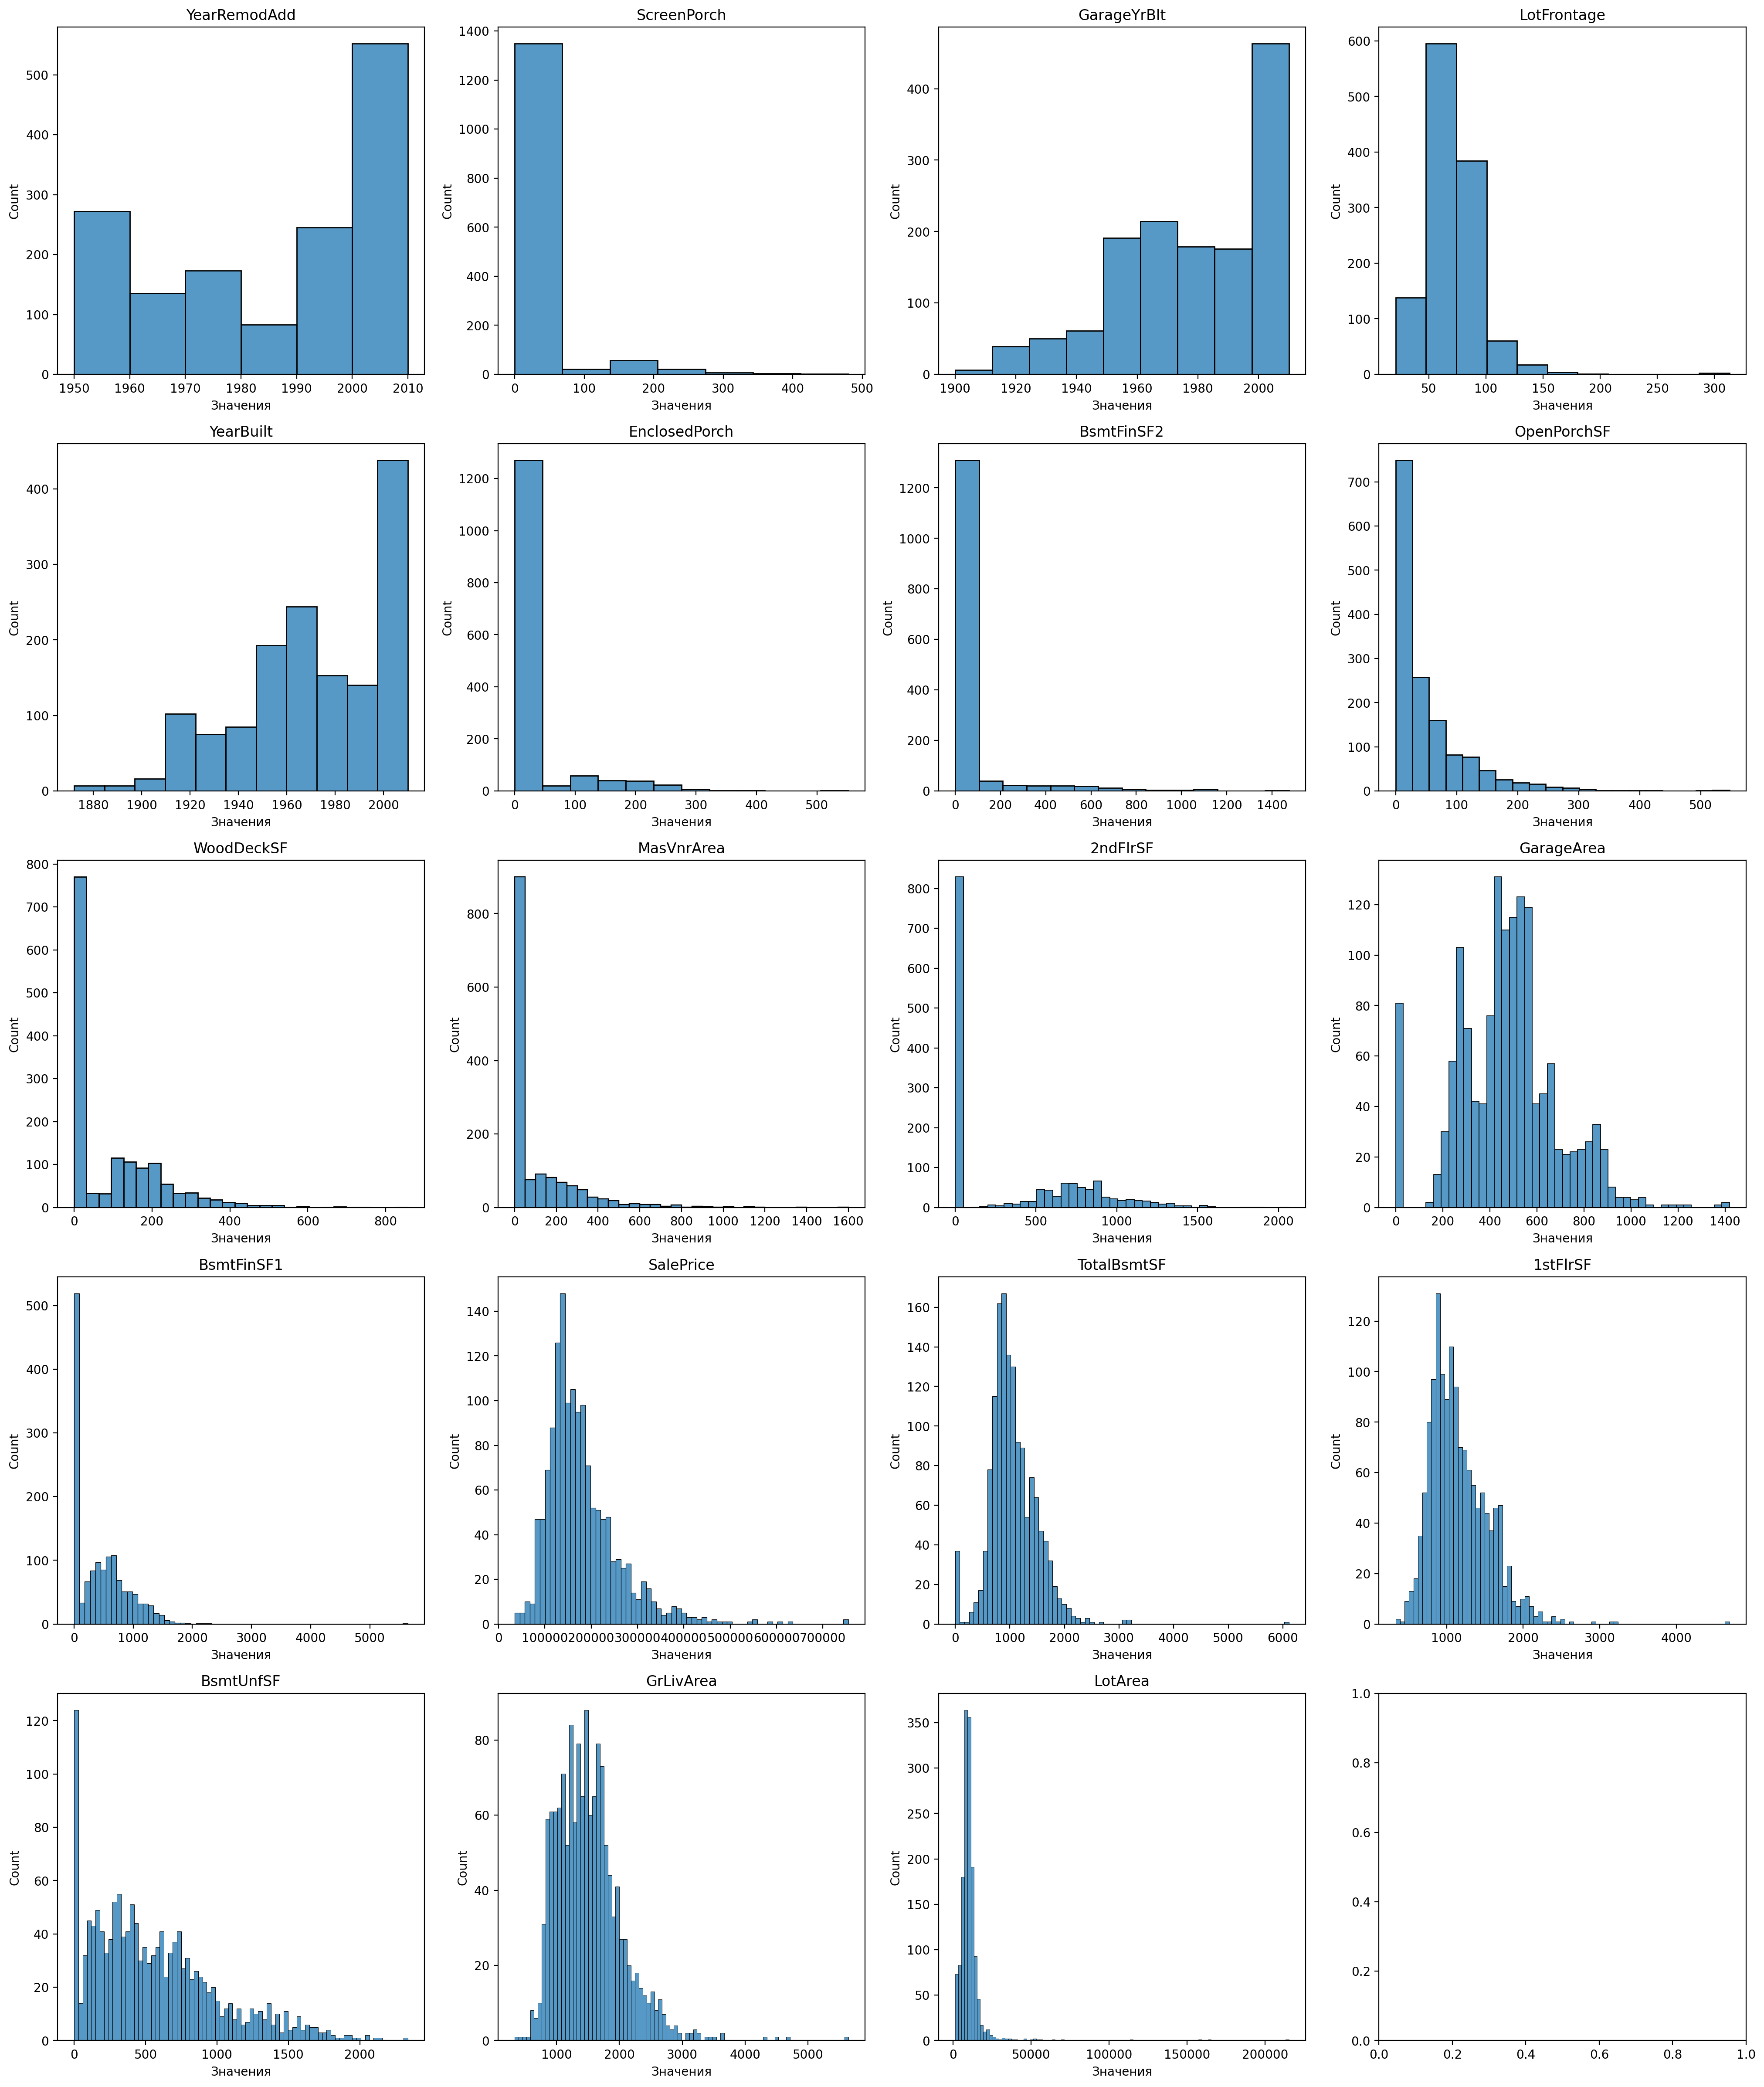

In [182]:
fig,axes= plt.subplots(5,4,figsize=(25,30))
for i,ax in enumerate(axes.flatten()[:-1]):
    sns.histplot(data=numeric_dt.loc[:,num_num.index].iloc[:,i],bins=num_num.iloc[i]//10,ax=ax)
    ax.set_title(numeric_dt.loc[:,num_num.index].columns[i])
    ax.set_xlabel('Значения')

## Вывод гистограмм

> Вывод

In [183]:
numeric_dt.nunique().sort_values()

HalfBath            3
BsmtHalfBath        3
FullBath            4
Fireplaces          4
KitchenAbvGr        4
BsmtFullBath        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
MoSold             12
TotRmsAbvGrd       12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

In [184]:
num_des=train.describe(include=np.number).T
cat_des=train.describe(include=np.object_).T
num_des

count           mean           std      min        25%   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00  \
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [185]:
cat_des['top_perc']=cat_des['freq']/cat_des['count']
cat_des.sort_values(by=['top_perc'],ascending=False,inplace=True)
cat_des.head(10)
val_counts = pd.DataFrame()
for feature in cat_des.head(10).index:
    val_counts=pd.concat([val_counts,pd.Series({feature+':':train[feature].count()})])
    val_counts=pd.concat([val_counts,train[feature].value_counts()],axis=0)
    #val_counts=
val_counts

0
Utilities:   1460.0
AllPub       1459.0
NoSeWa          1.0
Street:      1460.0
Pave         1454.0
Grvl            6.0
Condition2:  1460.0
Norm         1445.0
Feedr           6.0
Artery          2.0
RRNn            2.0
PosN            2.0
PosA            1.0
RRAn            1.0
RRAe            1.0
RoofMatl:    1460.0
CompShg      1434.0
Tar&Grv        11.0
WdShngl         6.0
WdShake         5.0
Metal           1.0
Membran         1.0
Roll            1.0
ClyTile         1.0
Heating:     1460.0
GasA         1428.0
GasW           18.0
Grav            7.0
Wall            4.0
OthW            2.0
Floor           1.0
GarageCond:  1379.0
TA           1326.0
Fa             35.0
Gd              9.0
Po              7.0
Ex              2.0
GarageQual:  1379.0
TA           1311.0
Fa             48.0
Gd             14.0
Ex              3.0
Po              3.0
LandSlope:   1460.0
Gtl          1382.0
Mod            65.0
Sev            13.0
CentralAir:  1460.0
Y            1365.0
N              95.0
Functional:  1460.0
Typ          1360.0
Min2           34.0
Min1           31.0
Mod            15.0
Maj1           14.0
Maj2            5.0
Sev             1.0

In [186]:
#np.where(,-1,train.columns
nums=np.intersect1d(train.columns,num_des.index)


In [187]:
nans= train.isna().sum()
nans=pd.concat([nans,train.dtypes],axis=1)
nans.columns=['nans','data_type']
nans.query('nans>0').sort_values('nans',ascending=False)

nans data_type
PoolQC        1453    object
MiscFeature   1406    object
Alley         1369    object
Fence         1179    object
MasVnrType     872    object
FireplaceQu    690    object
LotFrontage    259   float64
GarageType      81    object
GarageYrBlt     81   float64
GarageFinish    81    object
GarageQual      81    object
GarageCond      81    object
BsmtFinType2    38    object
BsmtExposure    38    object
BsmtFinType1    37    object
BsmtCond        37    object
BsmtQual        37    object
MasVnrArea       8   float64
Electrical       1    object

# Объединим

In [320]:
conc=train.shape[0]
train= pd.concat([train,test],ignore_index=True)


In [321]:
train


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0             60       RL         65.0     8450   Pave   NaN      Reg  \
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2914         160       RM         21.0     1936   Pave   NaN      Reg   
2915         160       RM         21.0     1894   Pave   NaN      Reg   
2916          20       RL        160.0    20000   Pave   NaN      Reg   
2917          85       RL         62.0    10441   Pave   NaN      Reg   
2918          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature   
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN  \
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
2914         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2915         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2916         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2917         Lvl    AllPub    Inside  ...        0    NaN  MnPrv        Shed   
2918         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal   208500.0  
1          0      5    2007        WD         Normal   181500.0  
2          0      9    2008        WD         Normal   223500.0  
3          0      2    2006        WD        Abnorml   140000.0  
4          0     12    2008        WD         Normal   250000.0  
...      ...    ...     ...       ...            ...        ...  
2914       0      6    2006        WD         Normal        NaN  
2915       0      4    2006        WD        Abnorml        NaN  
2916       0      9    2006        WD        Abnorml        NaN  
2917     700      7    2006        WD         Normal        NaN  
2918       0     11    2006        WD         Normal        NaN  

[2919 rows x 80 columns]

## Заменим нули

In [322]:
col_replacements = {'Alley': 'NoAccess',
                    'PoolQC': 'NoPool',
                    'Fence': 'NoFence',
                    'MiscFeature': 'NoMisc',
                    'FireplaceQu': 'NoFP',
                    'GarageType': 'NoGarage',
                    'GarageFinish': 'NoGarage',
                    'GarageQual': 'NoGarage',
                    'GarageCond': 'NoGarage',
                    'BsmtQual': 'NoBsmt',
                    'BsmtCond': 'NoBsmt',
                    'BsmtExposure': 'NoBsmt',
                    'BsmtFinType1': 'NoBsmt',
                    'BsmtFinType2': 'NoBsmt'}

# заменить значения NaN в каждом столбце, используя словарь
train.replace(np.nan, col_replacements, regex=True, inplace=True)
train['MasVnrType'].fillna('None', inplace=True)
train['Electrical'].fillna('Mix', inplace=True)
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace=True)
train.isna().sum().sum()

1481

In [323]:
#train['MiscFeature']
train['SalePrice'].fillna(train.loc[:conc,'SalePrice'].median(),inplace=True)
train.isna().sum().sum()
train

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape   
0             60       RL         65.0     8450   Pave  NoAccess      Reg  \
1             20       RL         80.0     9600   Pave  NoAccess      Reg   
2             60       RL         68.0    11250   Pave  NoAccess      IR1   
3             70       RL         60.0     9550   Pave  NoAccess      IR1   
4             60       RL         84.0    14260   Pave  NoAccess      IR1   
...          ...      ...          ...      ...    ...       ...      ...   
2914         160       RM         21.0     1936   Pave  NoAccess      Reg   
2915         160       RM         21.0     1894   Pave  NoAccess      Reg   
2916          20       RL        160.0    20000   Pave  NoAccess      Reg   
2917          85       RL         62.0    10441   Pave  NoAccess      Reg   
2918          60       RL         74.0     9627   Pave  NoAccess      Reg   

     LandContour Utilities LotConfig  ... PoolArea  PoolQC    Fence   
0            Lvl    AllPub    Inside  ...        0  NoPool  NoFence  \
1            Lvl    AllPub       FR2  ...        0  NoPool  NoFence   
2            Lvl    AllPub    Inside  ...        0  NoPool  NoFence   
3            Lvl    AllPub    Corner  ...        0  NoPool  NoFence   
4            Lvl    AllPub       FR2  ...        0  NoPool  NoFence   
...          ...       ...       ...  ...      ...     ...      ...   
2914         Lvl    AllPub    Inside  ...        0  NoPool  NoFence   
2915         Lvl    AllPub    Inside  ...        0  NoPool  NoFence   
2916         Lvl    AllPub    Inside  ...        0  NoPool  NoFence   
2917         Lvl    AllPub    Inside  ...        0  NoPool    MnPrv   
2918         Lvl    AllPub    Inside  ...        0  NoPool  NoFence   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0         NoMisc       0      2    2008        WD         Normal   208500.0  
1         NoMisc       0      5    2007        WD         Normal   181500.0  
2         NoMisc       0      9    2008        WD         Normal   223500.0  
3         NoMisc       0      2    2006        WD        Abnorml   140000.0  
4         NoMisc       0     12    2008        WD         Normal   250000.0  
...          ...     ...    ...     ...       ...            ...        ...  
2914      NoMisc       0      6    2006        WD         Normal   163000.0  
2915      NoMisc       0      4    2006        WD        Abnorml   163000.0  
2916      NoMisc       0      9    2006        WD        Abnorml   163000.0  
2917        Shed     700      7    2006        WD         Normal   163000.0  
2918      NoMisc       0     11    2006        WD         Normal   163000.0  

[2919 rows x 80 columns]

In [324]:
nans= train.isna().sum()
nans=pd.concat([nans,train.dtypes],axis=1)
nans.columns=['nans','data_type']

cols_nan=nans.query('nans>0').sort_values('nans',ascending=False).index.to_list()

nans.loc[cols_nan,:]

nans data_type
MSZoning         4    object
Utilities        2    object
BsmtFullBath     2   float64
BsmtHalfBath     2   float64
Functional       2    object
Exterior1st      1    object
Exterior2nd      1    object
BsmtFinSF1       1   float64
BsmtFinSF2       1   float64
BsmtUnfSF        1   float64
TotalBsmtSF      1   float64
KitchenQual      1    object
GarageCars       1   float64
GarageArea       1   float64
SaleType         1    object

In [325]:
nas=train.loc[train.isna().any(axis=1)][cols_nan]
#cols_nan=
#nas.loc[nas.loc[nas.isna().any(axis=1)],cols_nan]
def col_mode(col:str):
    return train[train.notna()][col].mode()[0]
def col_mean(col:str):
    return train[col].mean()
nas
#train[train.notna()]['Functional'].mode()[0]

MSZoning Utilities  BsmtFullBath  BsmtHalfBath Functional Exterior1st   
1555       RL    AllPub           0.0           0.0        Mod     Wd Sdng  \
1915      NaN       NaN           0.0           0.0       Min1     Wd Sdng   
1945       RL       NaN           0.0           0.0       Min2     BrkFace   
2120       RM    AllPub           NaN           NaN        Typ     MetalSd   
2151       RL    AllPub           1.0           0.0        Typ         NaN   
2188       RL    AllPub           NaN           NaN        Typ     Plywood   
2216      NaN    AllPub           0.0           0.0        NaN     AsbShng   
2250      NaN    AllPub           0.0           0.0       Maj1     Wd Sdng   
2473       RM    AllPub           0.0           0.0        NaN     Wd Sdng   
2489       RL    AllPub           1.0           0.0        Typ     Plywood   
2576       RM    AllPub           0.0           0.0        Typ     Wd Sdng   
2904      NaN    AllPub           0.0           0.0        Mod      CBlock   

     Exterior2nd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF KitchenQual   
1555     Wd Sdng         0.0         0.0      689.0        689.0         NaN  \
1915     Wd Sdng         0.0         0.0        0.0          0.0          TA   
1945     BrkFace         0.0         0.0     1632.0       1632.0          TA   
2120      CBlock         NaN         NaN        NaN          NaN          TA   
2151         NaN      1035.0         0.0      545.0       1580.0          Fa   
2188     Plywood         0.0         0.0        0.0          0.0          Ex   
2216     VinylSd         0.0         0.0        0.0          0.0          Fa   
2250     Wd Sdng         0.0         0.0      686.0        686.0          TA   
2473     Wd Sdng         0.0         0.0      771.0        771.0          TA   
2489     Plywood       190.0       873.0       95.0       1158.0          TA   
2576     Plywood       548.0         0.0      311.0        859.0          Gd   
2904     VinylSd         0.0         0.0        0.0          0.0          TA   

      GarageCars  GarageArea SaleType  
1555         1.0       180.0      COD  
1915         1.0       280.0    ConLD  
1945         2.0       495.0       WD  
2120         1.0       280.0    ConLD  
2151         0.0         0.0       WD  
2188         2.0       624.0       WD  
2216         2.0       487.0       WD  
2250         1.0       288.0       WD  
2473         1.0       264.0      COD  
2489         1.0       303.0      NaN  
2576         NaN         NaN       WD  
2904         1.0       270.0       WD

In [326]:
train.fillna({'MSZoning':col_mode('MSZoning'), 'Utilities':col_mode('Utilities'), 'Exterior1st':col_mode('Exterior1st'),
               'Exterior2nd':col_mode('Exterior2nd'),'SaleType':col_mode('SaleType'), 'Functional':col_mode('Functional'),
                   'KitchenQual':col_mode('KitchenQual'), 'BsmtFullBath':col_mean('BsmtFullBath'),'BsmtHalfBath':col_mean('BsmtHalfBath'),
                   'BsmtFinSF2':col_mean('BsmtFinSF2'),'BsmtFinSF1':col_mean('BsmtFinSF1'),'BsmtUnfSF':col_mean('BsmtUnfSF'),
                   'TotalBsmtSF':col_mean('TotalBsmtSF'),'GarageCars':col_mean('GarageCars'),'GarageArea':col_mean('GarageArea')},inplace=True)
train.isna().sum().sum()

0

In [327]:
nans= train.isna().sum()
nans=pd.concat([nans,train.dtypes],axis=1)
nans.columns=['nans','data_type']

cols_nan=nans.query('nans>0').sort_values('nans',ascending=False).index.to_list()

nans.loc[cols_nan,:]
nas=train.loc[train.isna().any(axis=1)][cols_nan]
nas

Empty DataFrame
Columns: []
Index: []

In [328]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
#from catboost import CatBoostEncoder
from category_encoders.utils import convert_input
from category_encoders import CatBoostEncoder
categorical_features=train.select_dtypes(include=['object']).columns.to_list()

cb = CatBoostRegressor()
encoder= CatBoostEncoder(cols=categorical_features)
train.iloc[:,-1]=train.iloc[:,-1].apply(np.log)

train=encoder.fit_transform(train.iloc[:,:-1],train.iloc[:,-1])
test=train.iloc[conc:,:]
train=train.iloc[:conc,:]


X_train,X_test,y_train,y_test=train_test_split(train.iloc[:,:-1],train.iloc[:,-1],test_size=0.2,random_state=42)

In [329]:

#cb.fit(X_train, y_train, cat_features=categorical_features)
#train_enc=cb.transform(train)


#X_train.loc[:,categorical_features]
train.describe().T

count          mean          std          min          25%   
MSSubClass     1460.0     56.897260    42.300571    20.000000    20.000000  \
MSZoning       1460.0     12.036971     0.166780    11.195560    12.086793   
LotFrontage    1460.0     69.917946    22.025858    21.000000    60.000000   
LotArea        1460.0  10516.828082  9981.264932  1300.000000  7553.500000   
Street         1460.0     12.030230     0.021158    11.646689    12.026198   
...               ...           ...          ...          ...          ...   
MiscVal        1460.0     43.489041   496.123024     0.000000     0.000000   
MoSold         1460.0      6.321918     2.703626     1.000000     5.000000   
YrSold         1460.0   2007.815753     1.328095  2006.000000  2007.000000   
SaleType       1460.0     12.027680     0.136675    11.681594    11.990216   
SaleCondition  1460.0     12.029036     0.138650    11.543154    12.004727   

                       50%           75%            max  
MSSubClass       50.000000     70.000000     190.000000  
MSZoning         12.096576     12.104543      12.317431  
LotFrontage      69.305795     79.000000     313.000000  
LotArea        9478.500000  11601.500000  215245.000000  
Street           12.030442     12.034426      12.186283  
...                    ...           ...            ...  
MiscVal           0.000000      0.000000   15500.000000  
MoSold            6.000000      8.000000      12.000000  
YrSold         2008.000000   2009.000000    2010.000000  
SaleType         11.996624     12.001684      12.502038  
SaleCondition    12.009792     12.014253      12.499336  

[79 rows x 8 columns]

In [330]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,make_scorer

def RMLSE(y_true, y_pred):
    """
    Определяем функцию для вычисления RMLSE (корень из среднеквадратической логарифмической ошибки)
    """
    return mean_squared_log_error(y_true, y_pred,squared=False)

rmlse = make_scorer(RMLSE, greater_is_better=False)

def create_model_dict(*models):
    """
    Функция для создания словаря моделей
    """
    model_dict = {}
    for model in models:
        model_name = model.__class__.__name__
        model_dict[model_name] = model
    return model_dict

def cross_val_results(models, X_train, y_train,X_test,y_test, cv=5, scoring=rmlse):
    """
    Функция для получения результатов кросс-валидации
    """
    results = {}
    #print(models,"\n",'пук')
    for model_name, model in models.items():
        cv_scores_train =cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring,n_jobs=-1)
        cv_scores_test = cross_val_score(model, X_test, y_test, cv=cv, scoring=scoring,n_jobs=-1)
        results[model_name] = {
            'Train': cv_scores_train.mean(),
            'Test': cv_scores_test.mean()
        }
        
    df_results = pd.DataFrame(results)
    if scoring == rmlse:
        df_results*=-1
    return df_results.T




In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import get_scorer_names

models = create_model_dict(RandomForestRegressor(random_state=42),LinearRegression(),cb)
df=cross_val_results(models,X_train,y_train,X_test,y_test)
#get_scorer_names()
#rf=RandomForestRegressor()
#cross_val_score(rf, X_train, y_train, scoring=rmlse,n_jobs=-1).mean()
#RMLSE(cb.predict(X_train),y_train)


Learning rate set to 0.040504
Learning rate set to 0.040504
Learning rate set to 0.040511
Learning rate set to 0.040504
0:	learn: 0.1338829	total: 16.1ms	remaining: 16.1s
0:	learn: 0.1364306	total: 11ms	remaining: 11s
1:	learn: 0.1301682	total: 31.4ms	remaining: 15.7s
0:	learn: 0.1307464	total: 22.7ms	remaining: 22.7s
0:	learn: 0.1355155	total: 27.3ms	remaining: 27.3s
1:	learn: 0.1324506	total: 28.5ms	remaining: 14.2s
1:	learn: 0.1271205	total: 36.5ms	remaining: 18.2s
1:	learn: 0.1317007	total: 41.2ms	remaining: 20.6s
2:	learn: 0.1265210	total: 49.4ms	remaining: 16.4s
2:	learn: 0.1288896	total: 43.8ms	remaining: 14.5s
2:	learn: 0.1279367	total: 47.2ms	remaining: 15.7s
2:	learn: 0.1236553	total: 48.4ms	remaining: 16.1s
3:	learn: 0.1231881	total: 59.9ms	remaining: 14.9s
3:	learn: 0.1256914	total: 52.8ms	remaining: 13.2s
3:	learn: 0.1247300	total: 56ms	remaining: 13.9s
3:	learn: 0.1206246	total: 54.5ms	remaining: 13.6s
4:	learn: 0.1198621	total: 68.4ms	remaining: 13.6s
4:	learn: 0.1223643

In [332]:
df

Train      Test
RandomForestRegressor  0.004828  0.005997
LinearRegression       0.005344  0.008048
CatBoostRegressor      0.004953  0.005709

In [349]:
#cb.fit(X_train, y_train)
X_res=test.iloc[:,:-1]
y_pred = cb.predict(X_res)
y_pred=np.exp(y_pred)

res= pd.DataFrame({'ID':X_res.index.to_list(),'SalePrice':y_pred})
res

ID      SalePrice
0     1460  163861.116406
1     1461  164389.340261
2     1462  162639.128704
3     1463  163345.777114
4     1464  162329.565583
...    ...            ...
1454  2914  160063.930215
1455  2915  160088.369336
1456  2916  156693.976861
1457  2917  160359.878025
1458  2918  162845.626378

[1459 rows x 2 columns]

In [350]:
res['ID']+=1

In [351]:
res.set_index('ID',drop=True,inplace=True)
res

SalePrice
ID                 
1461  163861.116406
1462  164389.340261
1463  162639.128704
1464  163345.777114
1465  162329.565583
...             ...
2915  160063.930215
2916  160088.369336
2917  156693.976861
2918  160359.878025
2919  162845.626378

[1459 rows x 1 columns]

In [352]:
res.to_csv('submission.csv', header=True)